# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch.nn as nn
from torch import optim

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

In [3]:
set(trainset.train_labels.numpy())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

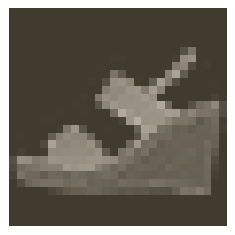

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784, 200),
                      nn.ReLU(),
                      nn.Linear(200, 100),
                      nn.ReLU(),
                      nn.Linear(100, 10),
                      nn.LogSoftmax(dim=1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
crit = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.01)

In [7]:
# TODO: Train the network here
for i in range(10):
    running_loss = 0.0
    for xb, yb in trainloader:
        xb = xb.view(xb.shape[0], -1)
        opt.zero_grad()
        logits = model(xb)
        loss = crit(logits, yb)
        running_loss += loss.item()
        loss.backward()
        opt.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5614660985624866
Training loss: 0.44310577445701244
Training loss: 0.41334167513638925
Training loss: 0.4068006600604764
Training loss: 0.39105290168129814
Training loss: 0.3847816229930946
Training loss: 0.373575088407185
Training loss: 0.37165550543650633
Training loss: 0.36349347831883916
Training loss: 0.3685568132952078


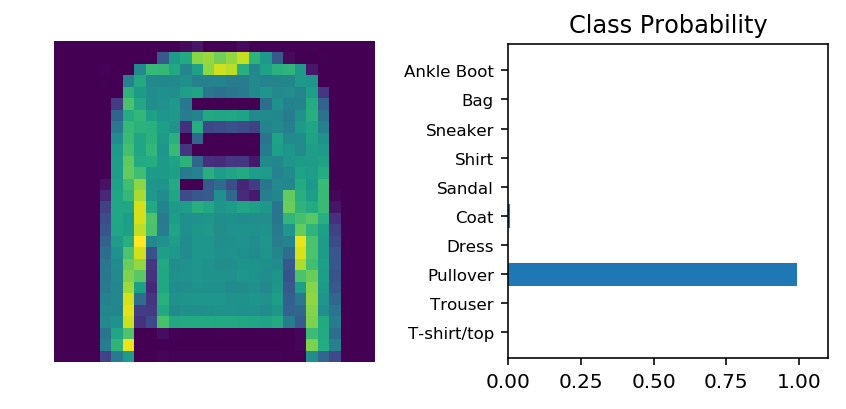

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

### Using Custom Model class

In [9]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 400)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(400, 100)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(100, 10)
        self.act3 = nn.LogSoftmax(dim=1)
        
    
    def forward(self, x):
        
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = self.act1(x)
        
        x = self.fc2(x)
        x = self.act2(x)
        
        x = self.fc3(x)
        x = self.act3(x)
        
        return x

In [10]:
model2 = Classifier()
crit = nn.CrossEntropyLoss()
opt = optim.Adam(model2.parameters(), lr=0.01)

In [11]:
for i in range(10):
    running_loss = 0.0
    for xb, yb in trainloader:
        opt.zero_grad()
        logits = model2(xb)
        loss = crit(logits, yb)
        running_loss += loss.item()
        loss.backward()
        opt.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.570385519709033
Training loss: 0.45627987422922783
Training loss: 0.42194935979683007
Training loss: 0.4042441157786958
Training loss: 0.3981212948415198
Training loss: 0.38480692762714713
Training loss: 0.37745814542494605
Training loss: 0.3801593542384949
Training loss: 0.36909364605509143
Training loss: 0.3739360147940197
